In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [90]:
cols = ['Age', 'Gender', 'TB', 'DB', 'AAP', 'Sgpt A', 'Sgot AA', 'TP', 'ALB', 'AG Ratio','Class']
df = pd.read_csv('ILPD.csv', header = None, names = cols)
df.head()

,Age,Gender,TB,DB,AAP,Sgpt A,Sgot AA,TP,ALB,AG Ratio,Class
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [91]:
df.shape

(583, 11)

In [92]:
df['Class'].value_counts()

1    416
2    167
Name: Class, dtype: int64

In [93]:
df['Class'] = df['Class'].astype('object')

In [94]:
num_cols = list(df.select_dtypes(exclude = 'object'))
cat_cols = list(df.select_dtypes(include = 'object'))
cat_cols, num_cols

(['Gender', 'Class'],
 ['Age', 'TB', 'DB', 'AAP', 'Sgpt A', 'Sgot AA', 'TP', 'ALB', 'AG Ratio'])

In [95]:
df.describe()

,Age,TB,DB,AAP,Sgpt A,Sgot AA,TP,ALB,AG Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


In [96]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
Age         583 non-null int64
Gender      583 non-null object
TB          583 non-null float64
DB          583 non-null float64
AAP         583 non-null int64
Sgpt A      583 non-null int64
Sgot AA     583 non-null int64
TP          583 non-null float64
ALB         583 non-null float64
AG Ratio    579 non-null float64
Class       583 non-null object
dtypes: float64(5), int64(4), object(2)
memory usage: 50.2+ KB


In [97]:
num_cols[:-1]

['Age', 'TB', 'DB', 'AAP', 'Sgpt A', 'Sgot AA', 'TP', 'ALB']

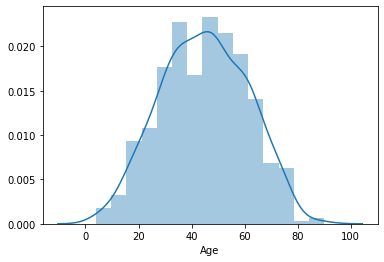

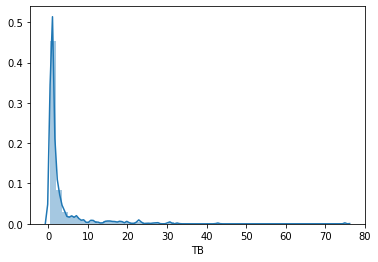

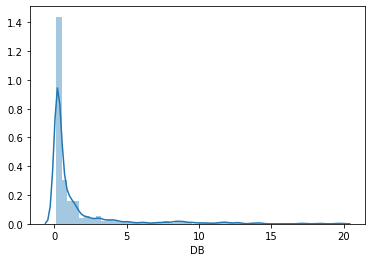

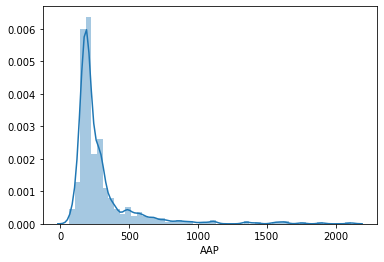

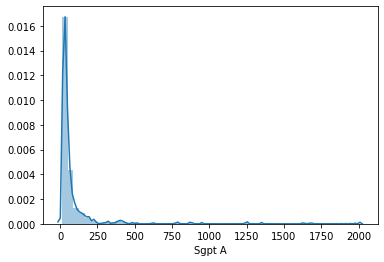

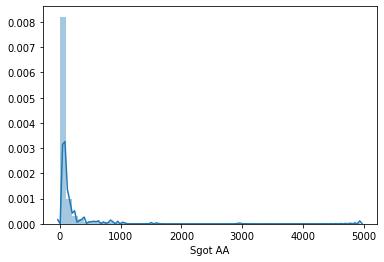

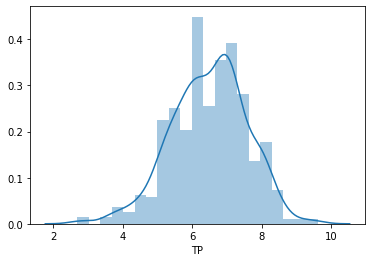

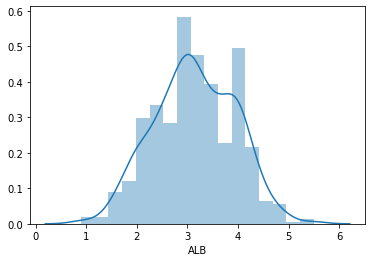

In [98]:
for i in num_cols[:-1]:
    sns.distplot(df[i])
    plt.show()

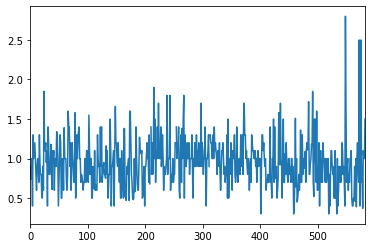

In [99]:
df['AG Ratio'].plot()

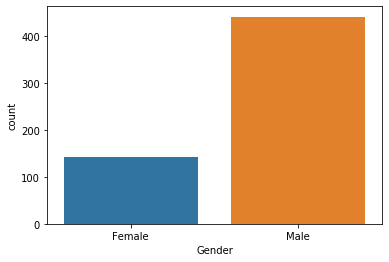

In [100]:
sns.countplot(df['Gender'])
plt.show()

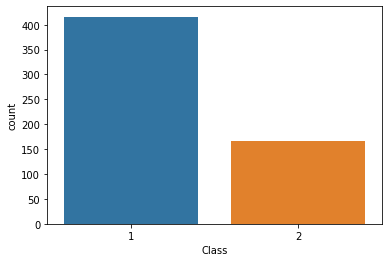

In [101]:
sns.countplot(df['Class'])
plt.show()

Obs:
    fihkdjj

In [102]:
df.isnull().sum()

Age         0
Gender      0
TB          0
DB          0
AAP         0
Sgpt A      0
Sgot AA     0
TP          0
ALB         0
AG Ratio    4
Class       0
dtype: int64

AG Ratio has 4 missing values, we will see how the AG ratio is spread with CLass, and accordingly decide the imputation for null values.m

In [187]:
df['AG Ratio'].groupby(df['Class']).mean()

Class
0    0.914179
1    1.029576
Name: AG Ratio, dtype: float64

In [104]:
df[df['AG Ratio'].isnull()]

,Age,Gender,TB,DB,AAP,Sgpt A,Sgot AA,TP,ALB,AG Ratio,Class
209,45,Female,0.9,0.3,189,23,33,6.6,3.9,NaN,1
241,51,Male,0.8,0.2,230,24,46,6.5,3.1,NaN,1
253,35,Female,0.6,0.2,180,12,15,5.2,2.7,NaN,2
312,27,Male,1.3,0.6,106,25,54,8.5,4.8,NaN,2


We will compute the null value as mean for that class.

In [105]:
df["AG Ratio"] = df.groupby("Class")["AG Ratio"].transform(lambda x:x.fillna(x.mean()))
df["AG Ratio"].isnull().sum()

0

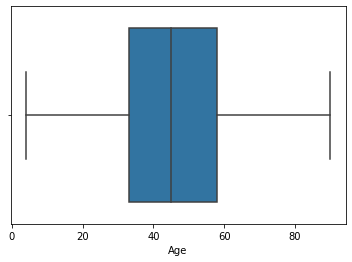

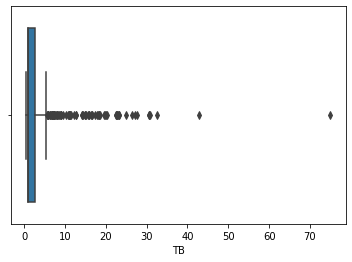

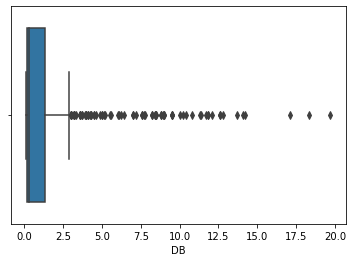

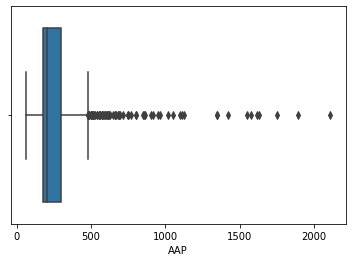

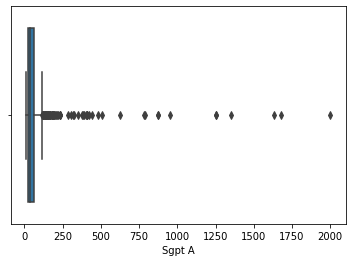

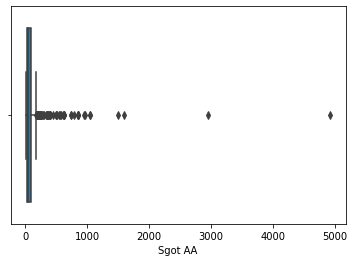

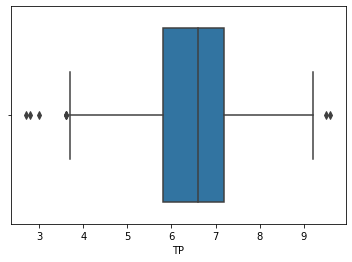

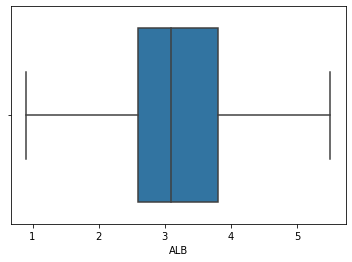

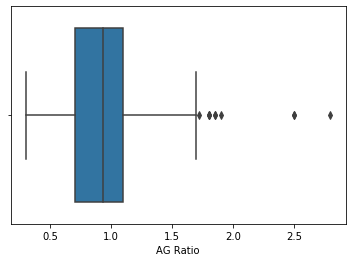

In [106]:
for i in num_cols:
    sns.boxplot(df[i])
    plt.show()

Barring Age and ALB, all variables have outliers. AG Ratio and Tota protein have only few outliers, which can be kept as it is.
Rest have many outleirs towards the right side. We can remove these later if the results are not good.

In [107]:
# We will confirm by checking the skewness and take a call if we wantto remove teh outliers or transform teh variables.
for i in num_cols:
    print(i)
    print(df[i].skew())
    print(df[i].skew()>1, '\n')

Age
-0.029385312710346265
False 

TB
4.90747399372197
True 

DB
3.21240286208773
True 

AAP
3.7651063973073766
True 

Sgpt A
6.549191929444977
True 

Sgot AA
10.54617721691247
True 

TP
-0.28567218643573844
False 

ALB
-0.04368472854683253
False 

AG Ratio
0.9937519947898003
False 



We can scale the data instead of outlier removal since we have very less data.
These can be treated as extreme values and standard scaling will normalize the same.
Now we look at our TG valrible.

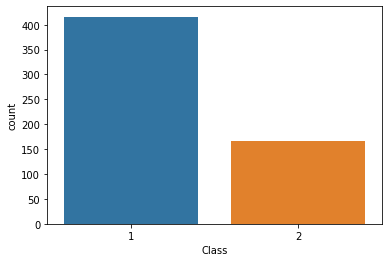

In [108]:
sns.countplot(df['Class'])
plt.show()

In [109]:
(df['Class'].value_counts().values[0]/len(df))*100

71.35506003430532

In [110]:
(df['Class'].value_counts().values[1]/len(df))*100

28.644939965694682

In [111]:
(df['Class'].value_counts().values[1]/df['Class'].value_counts().values[0])*100

40.144230769230774

Out target variable is definitely imbalanced, however to treat the inbalance, the minority variable should be less than 20% of teh majority datasen,
Minority '2' comprises of 28% of whole dataset and 40% of the majority category.

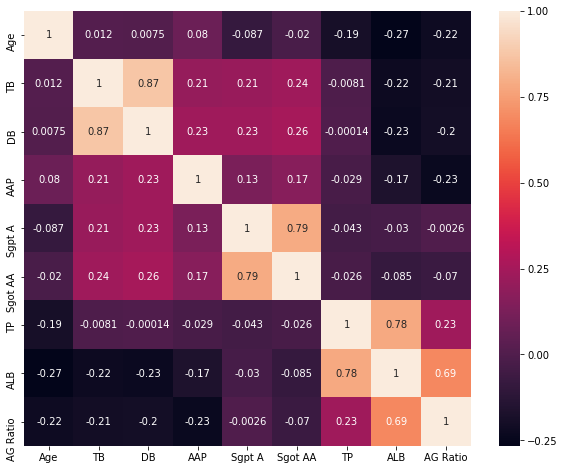

In [112]:
plt.figure(figsize = (10,8))
sns.heatmap(df[num_cols].corr(), annot = True)
plt.show()

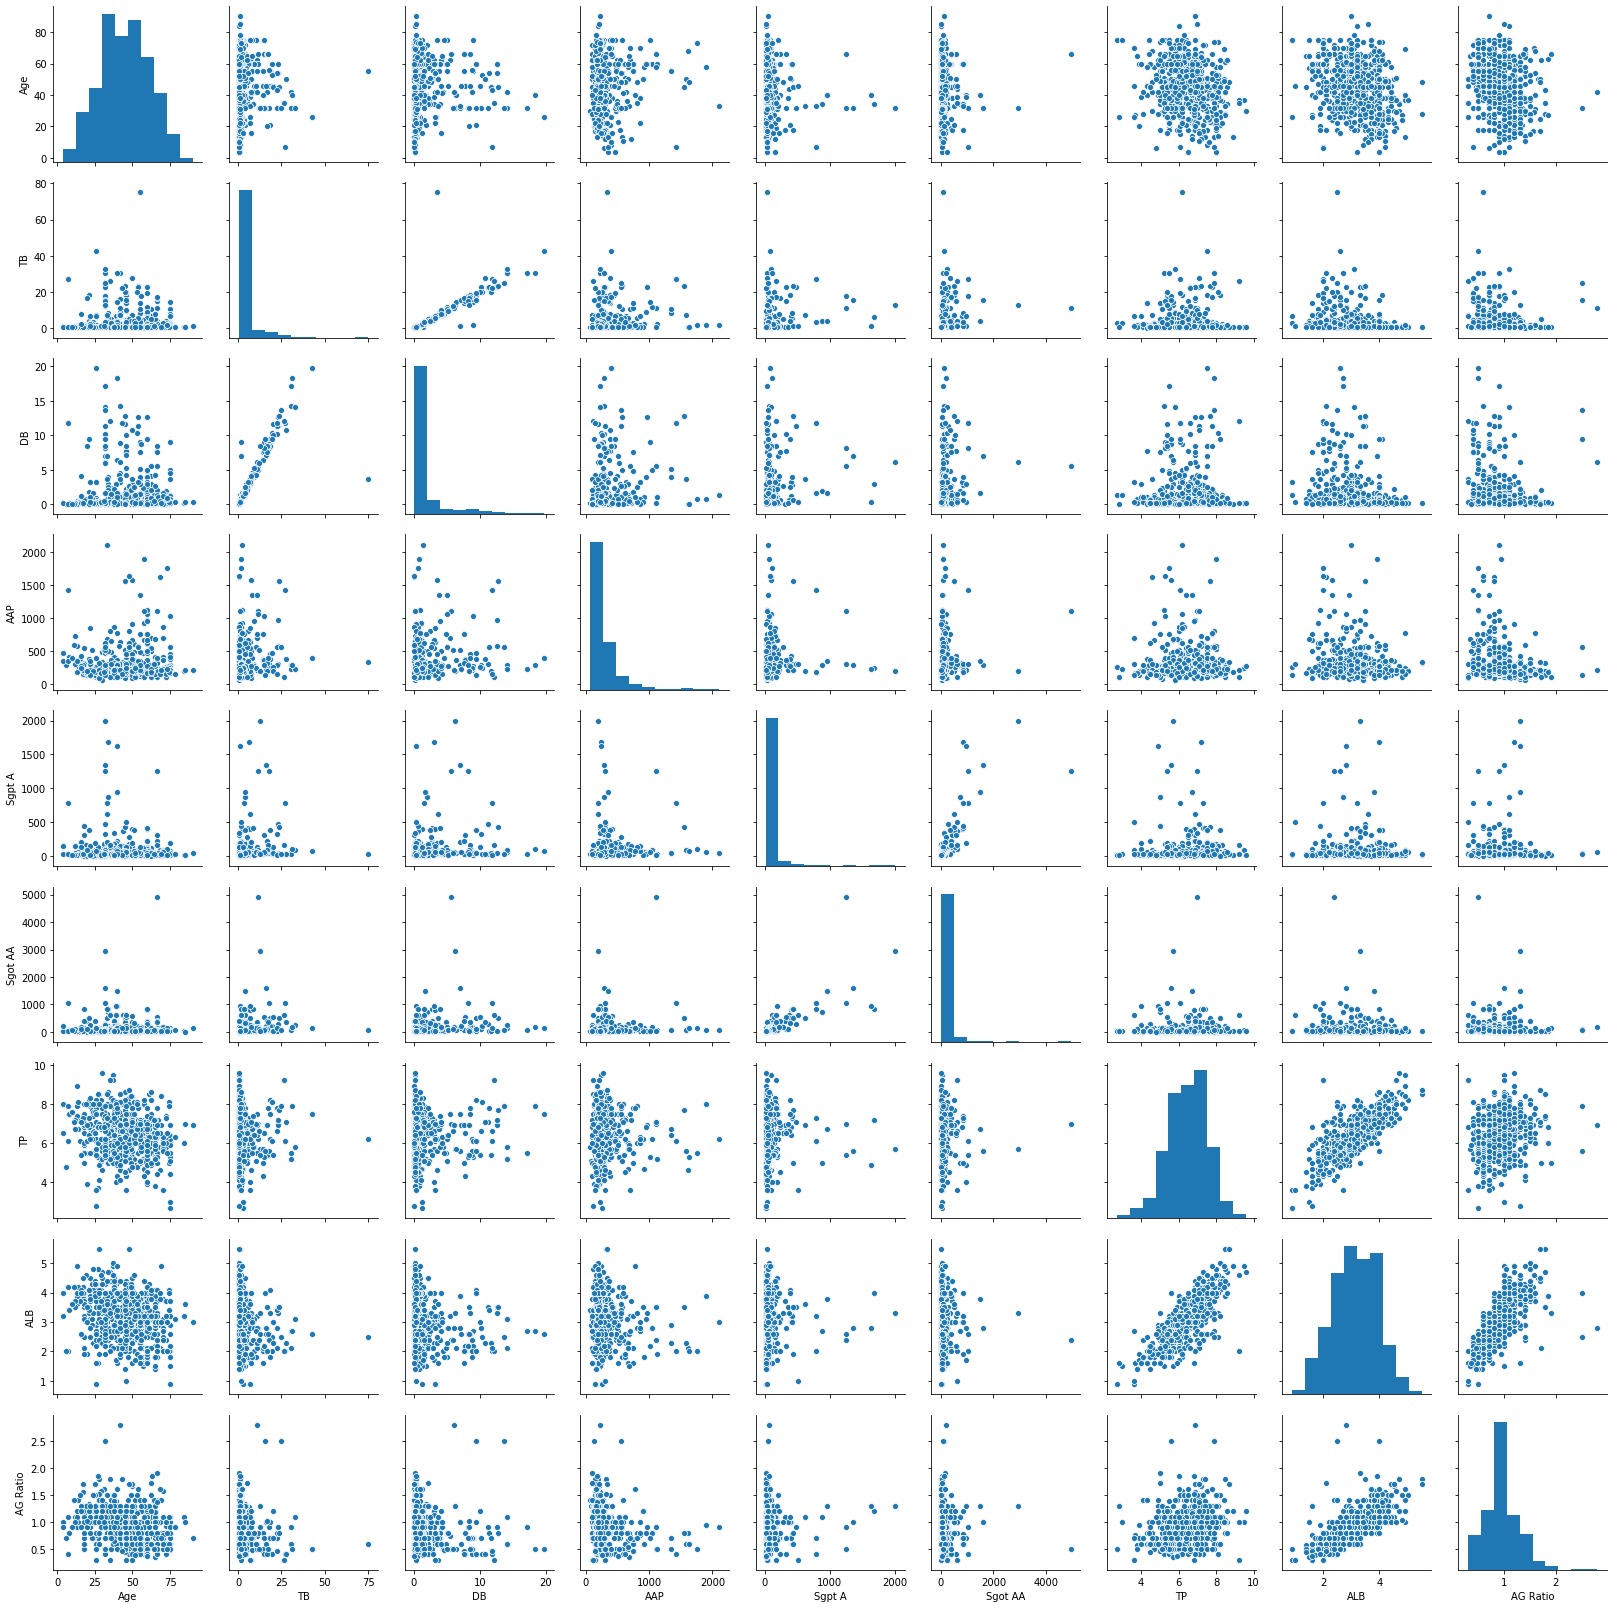

In [113]:
sns.pairplot(df[num_cols])
plt.show()

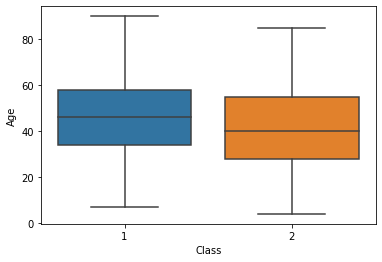

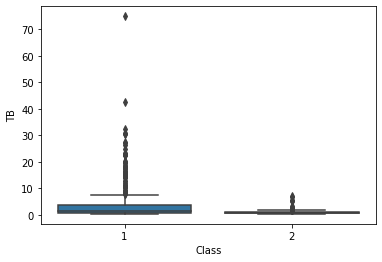

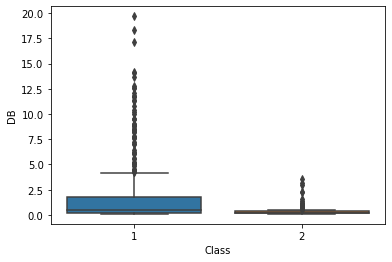

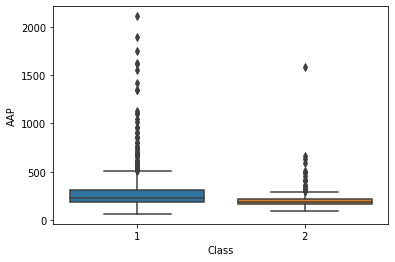

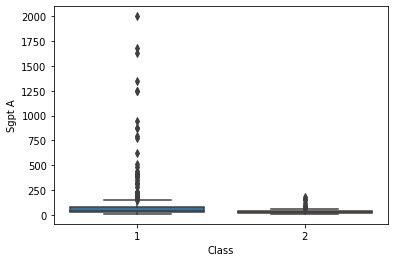

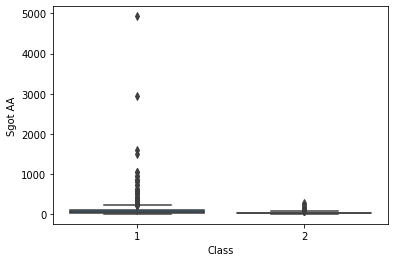

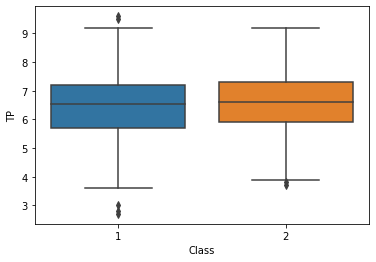

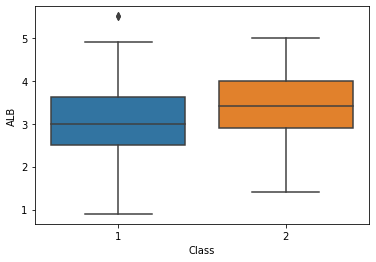

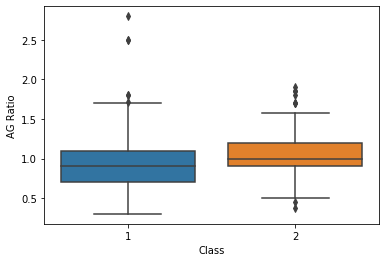

In [114]:
for i in num_cols:
    sns.boxplot(df['Class'], df[i])
    plt.show()

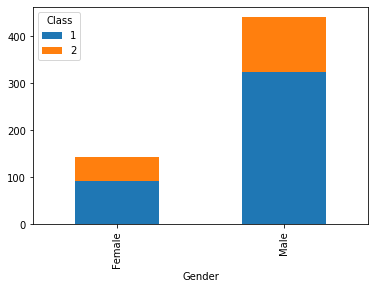

In [115]:
w = pd.crosstab(df['Gender'], df['Class'])
w.plot(kind ='bar', stacked = True)
plt.show()

All ar ehighly correlated. Confirm statistically using vif. Also check with manwhineyu first
ALB va AG Ratio
ALB vs TP
DB vs TB
Sgpt A vs Sgot AA

In [116]:
num_cols

['Age', 'TB', 'DB', 'AAP', 'Sgpt A', 'Sgot AA', 'TP', 'ALB', 'AG Ratio']

In [117]:
df['Class']==1

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8      False
9       True
10      True
11      True
12     False
13      True
14      True
15     False
16      True
17     False
18      True
19      True
20      True
21      True
22      True
23      True
24     False
25      True
26      True
27      True
28     False
29     False
       ...  
553     True
554     True
555     True
556     True
557     True
558     True
559     True
560     True
561     True
562     True
563     True
564    False
565     True
566    False
567     True
568     True
569     True
570     True
571     True
572     True
573     True
574     True
575     True
576     True
577     True
578    False
579     True
580     True
581     True
582    False
Name: Class, Length: 583, dtype: bool

In [118]:
d1 = df[df['Class']==1]['Age']
d2 = df[df['Class']==2]['Age']
_, pval = stats.mannwhitneyu(d1, d2)
print(pval)
print(pval>0.05)

0.0008871841242601723
False


In [119]:
d1 = df[df['Class']==1]['TB']
d2 = df[df['Class']==2]['TB']
_, pval = stats.mannwhitneyu(d1, d2)
print(pval)
print(pval>0.05)

1.1447594776025207e-13
False


In [120]:
d1 = df[df['Class']==1]['DB']
d2 = df[df['Class']==2]['DB']
_, pval = stats.mannwhitneyu(d1, d2)
print(pval)
print(pval>0.05)

3.7155629439927545e-13
False


In [121]:
d1 = df[df['Class']==1]['AAP']
d2 = df[df['Class']==2]['AAP']
_, pval = stats.mannwhitneyu(d1, d2)
print(pval)
print(pval>0.05)

2.1736171578351033e-11
False


In [122]:
d1 = df[df['Class']==1]['Sgpt A']
d2 = df[df['Class']==2]['Sgpt A']
_, pval = stats.mannwhitneyu(d1, d2)
print(pval)
print(pval>0.05)

1.1664675691208342e-12
False


In [123]:
d1 = df[df['Class']==1]['Sgot AA']
d2 = df[df['Class']==2]['Sgot AA']
_, pval = stats.mannwhitneyu(d1, d2)
print(pval)
print(pval>0.05)

4.604831224544726e-14
False


In [124]:
d1 = df[df['Class']==1]['TP']
d2 = df[df['Class']==2]['TP']
_, pval = stats.mannwhitneyu(d1, d2)
print(pval)
print(pval>0.05)

0.21857332379621958
True


In [125]:
d1 = df[df['Class']==1]['ALB']
d2 = df[df['Class']==2]['ALB']
_, pval = stats.mannwhitneyu(d1, d2)
print(pval)
print(pval>0.05)

2.783501983914657e-05
False


In [126]:
d1 = df[df['Class']==1]['AG Ratio']
d2 = df[df['Class']==2]['AG Ratio']
_, pval = stats.mannwhitneyu(d1, d2)
print(pval)
print(pval>0.05)

2.00480682755142e-06
False


In [127]:
s, pval, x, exp = stats.chi2_contingency(w)
print(pval)
print(pval>0.05)

0.059665846857774464
True


In [128]:
#Basis statitical tests, we can drop Gender and TP. But first we will build a base Logit regression model on all the variables and then see what diffenerce this has made.
#Before that we need to convert CLass to int and Gender to get dummies.
df1 = df.copy()
df['Class'] = df['Class'].astype('int')
df['Class'] = df['Class'].apply ( lambda x : 1 if x == 2 else 0 )
df = pd.get_dummies(df)
df.head(2)

,Age,TB,DB,AAP,Sgpt A,Sgot AA,TP,ALB,AG Ratio,Class,Gender_Female,Gender_Male
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,0,1,0
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,0,0,1


In [129]:
X = df.drop(['Class'], axis = 1)
y = df['Class']

In [130]:
import statsmodels.api as sm
xc = sm.add_constant ( X )
model = sm.Logit ( y , xc ).fit ( )
model.summary()

C:\Users\Shweta  Sharma\Anaconda\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Optimization terminated successfully.
         Current function value: 0.491552
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  583
Model:                          Logit   Df Residuals:                      572
Method:                           MLE   Df Model:                           10
Date:                Tue, 21 Jul 2020   Pseudo R-squ.:                  0.1793
Time:                        01:46:06   Log-Likelihood:                -286.57
converged:                       True   LL-Null:                       -349.18
Covariance Type:            nonrobust   LLR p-value:                 4.406e-22
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.2735   5.94e+06   3.83e-07      1.000   -1.16e+07    1.16e+07
Age              -0.0188      0.006     -2.953      0.003      -0.031      -0.006
TB               -0.0119      0.089     -0.134      0.893      -0.185       0.162
DB               -0.4453      0.242     -1.838      0.066      -0.920       0.030
AAP              -0.0013      0.001     -1.585      0.113      -0.003       0.000
Sgpt A           -0.0118      0.005     -2.323      0.020      -0.022      -0.002
Sgot AA          -0.0026      0.003     -0.826      0.409      -0.009       0.004
TP               -0.8580      0.362     -2.370      0.018      -1.567      -0.148
ALB               1.5522      0.704      2.205      0.027       0.172       2.932
AG Ratio         -1.5930      1.075     -1.482      0.138      -3.701       0.514
Gender_Female     1.1487   5.94e+06   1.93e-07      1.000   -1.16e+07    1.16e+07
Gender_Male       1.1248   5.94e+06   1.89e-07      1.000   -1.16e+07    1.16e+07
=================================================================================
"""

In [146]:
xc = xc.drop(['Gender_Female', 'Gender_Male'], axis =1)
model = sm.Logit ( y , xc ).fit ( )
model.summary()

Optimization terminated successfully.
         Current function value: 0.491561
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  583
Model:                          Logit   Df Residuals:                      573
Method:                           MLE   Df Model:                            9
Date:                Tue, 21 Jul 2020   Pseudo R-squ.:                  0.1793
Time:                        02:06:14   Log-Likelihood:                -286.58
converged:                       True   LL-Null:                       -349.18
Covariance Type:            nonrobust   LLR p-value:                 1.145e-22
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.4130      1.277      2.673      0.008       0.911       5.915
Age           -0.0188      0.006     -2.956      0.003      -0.031      -0.006
TB            -0.0119      0.089     -0.135      0.893      -0.186       0.162
DB            -0.4470      0.242     -1.847      0.065      -0.921       0.027
AAP           -0.0013      0.001     -1.586      0.113      -0.003       0.000
Sgpt A        -0.0118      0.005     -2.334      0.020      -0.022      -0.002
Sgot AA       -0.0026      0.003     -0.829      0.407      -0.009       0.004
TP            -0.8596      0.362     -2.374      0.018      -1.569      -0.150
ALB            1.5574      0.703      2.215      0.027       0.180       2.935
AG Ratio      -1.6039      1.071     -1.497      0.134      -3.704       0.496
==============================================================================
"""

In [148]:
xc = xc.drop(['AAP', 'AG Ratio'], axis =1)
model = sm.Logit ( y , xc ).fit ( )
model.summary()

Optimization terminated successfully.
         Current function value: 0.496963
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Class   No. Observations:                  583
Model:                          Logit   Df Residuals:                      577
Method:                           MLE   Df Model:                            5
Date:                Tue, 21 Jul 2020   Pseudo R-squ.:                  0.1703
Time:                        02:07:45   Log-Likelihood:                -289.73
converged:                       True   LL-Null:                       -349.18
Covariance Type:            nonrobust   LLR p-value:                 5.349e-24
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.6825      0.773      2.177      0.029       0.168       3.197
Age           -0.0185      0.006     -2.912      0.004      -0.031      -0.006
DB            -0.5470      0.174     -3.146      0.002      -0.888      -0.206
Sgpt A        -0.0158      0.004     -4.040      0.000      -0.024      -0.008
TP            -0.4326      0.175     -2.468      0.014      -0.776      -0.089
ALB            0.6666      0.249      2.674      0.008       0.178       1.155
==============================================================================
"""

In [149]:
xc.columns

Index(['const', 'Age', 'DB', 'Sgpt A', 'TP', 'ALB'], dtype='object')

In [151]:
X_p = X[['Age', 'DB', 'Sgpt A', 'TP', 'ALB']]
X_p.head(2)

,Age,DB,Sgpt A,TP,ALB
0,1.252098,-0.493964,-0.354665,0.292120,0.198969
1,1.066637,1.430423,-0.091599,0.937566,0.073157


In [131]:
#Before we split the data we will fisrt transfor the data using standard scalar
from sklearn.preprocessing import StandardScaler

for i in num_cols:
    SE = StandardScaler()
    X[i] = SE.fit_transform ( X [ i ].values.reshape ( -1 , 1 ) )
X.head(2)

,Age,TB,DB,AAP,Sgpt A,Sgot AA,TP,ALB,AG Ratio,Gender_Female,Gender_Male
0,1.252098,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.292120,0.198969,-0.148413,1,0
1,1.066637,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.937566,0.073157,-0.651145,0,1


In [133]:
#Basis statitical tests, we can drop Gender and TP.
X_s = X.drop(['TP', 'Gender_Female', 'Gender_Male'], axis = 1)
X_s.head(2)

,Age,TB,DB,AAP,Sgpt A,Sgot AA,ALB,AG Ratio
0,1.252098,-0.418878,-0.493964,-0.426715,-0.354665,-0.318393,0.198969,-0.148413
1,1.066637,1.225171,1.430423,1.682629,-0.091599,-0.034333,0.073157,-0.651145


Now we have X and X_s as 2 variation to try out all our models.

In [136]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split ( X , y , test_size = 0.3 , random_state = 0 ) 

In [139]:
_, pval = stats.chisquare ( [ len ( y ) , len ( y_train ) , len ( y_test ) ] )
print(pval)
print(pval>0.05)

1.5318461495995856e-47
False


In [140]:
stats.chisquare ( [ len ( X ) , len ( X_train ) , len ( X_test ) ] )
print(pval)
print(pval>0.05)

1.5318461495995856e-47
False


In [134]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score


In [154]:
model = []
model.append(['LogisticRegression', LogisticRegression()])
model.append(['DecisionTreeClassifier', DecisionTreeClassifier()])
model.append(['RandomForestClassifier', RandomForestClassifier()])
model.append(['GaussianNB', GaussianNB()])
model.append(['KNeighborsClassifier', KNeighborsClassifier()])
model


[['LogisticRegression',
  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=100,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False)],
 ['DecisionTreeClassifier',
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         random_state=None, splitter='best')],
 ['RandomForestClassifier',
  RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                         criterion='gini', max_depth=None, max_fea

# Original db. no transformations

In [170]:
acc_test = []
acc_train = []
kappa = []
name = []

for k, i in model:
    i.fit(X_train, y_train)
    ypred = i.predict(X_test)
    ypred2 = i.predict(X_train)
    
    name.append(k)
    acc_test.append(accuracy_score(y_test, ypred))
    acc_train.append(accuracy_score(y_train, ypred2))
    kappa.append(cohen_kappa_score(y_test,ypred))
    
    print(k)
    print(classification_report(y_test, ypred))
    print('Train Accuracy score: ', accuracy_score(y_train, ypred2))
    print('Test Accuracy score: ', accuracy_score(y_test, ypred))
    print('Confusion Matrix: \n ', confusion_matrix(y_test, ypred))
    print('Cohen Kappa score: ', cohen_kappa_score(y_test,ypred), '\n\n')
    

LogisticRegression
              precision    recall  f1-score   support

           0       0.72      0.91      0.80       122
           1       0.48      0.19      0.27        53

    accuracy                           0.69       175
   macro avg       0.60      0.55      0.54       175
weighted avg       0.65      0.69      0.64       175

Train Accuracy score:  0.7377450980392157
Test Accuracy score:  0.6914285714285714
Confusion Matrix: 
  [[111  11]
 [ 43  10]]
Cohen Kappa score:  0.118798955613577 


DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       122
           1       0.40      0.36      0.38        53

    accuracy                           0.64       175
   macro avg       0.56      0.56      0.56       175
weighted avg       0.63      0.64      0.63       175

Train Accuracy score:  1.0
Test Accuracy score:  0.64
Confusion Matrix: 
  [[93 29]
 [34 19]]
Cohen Kappa score:  0.12409628982283316 



In [142]:
r1 = pd.DataFrame(columns = ['Model', 'Test Accuracy', 'Train Accuracy', 'Cohen Kappa'])
r1['Model'] = name
r1['Test Accuracy'] = acc_test
r1['Train Accuracy'] = acc_train
r1['Cohen Kappa'] = kappa
r1

,Model,Test Accuracy,Train Accuracy,Cohen Kappa
0,LogisticRegression,0.691429,0.737745,0.118799
1,DecisionTreeClassifier,0.617143,1.000000,0.078585
2,RandomForestClassifier,0.691429,1.000000,0.172069
3,GaussianNB,0.571429,0.529412,0.275142
4,KNeighborsClassifier,0.628571,0.784314,0.043877


LogisticRegression ::  biaserror:  0.25336923321281746  variance:  0.0016873528281610406
DecisionTreeClassifier ::  biaserror:  0.41392045142318046  variance:  0.0031993502161675232
RandomForestClassifier ::  biaserror:  0.26386276811823417  variance:  0.002379130744754833
GaussianNB ::  biaserror:  0.26883762926258714  variance:  0.001686604293665848
KNeighborsClassifier ::  biaserror:  0.3499016322521368  variance:  0.008039890603806018


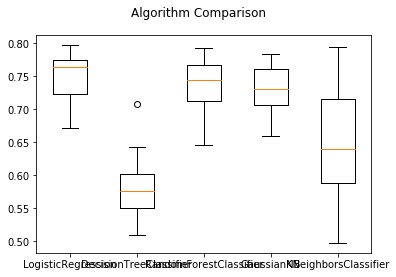

In [160]:
# evaluate each model in turn
from sklearn import model_selection
results = []
names = []
for name, i in model:
    kfold = model_selection.KFold(shuffle = True, n_splits = 10, random_state = 0)
    cv_results = model_selection.cross_val_score(i, X, y, cv = kfold, scoring = 'roc_auc')
    results.append(cv_results)
    names.append(name)
    print(name,':: ','biaserror: ',1-np.mean(cv_results),' variance: ',np.var((cv_results), ddof = 1))
    
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Shortlisted using Statistical test 

In [143]:
X_trains , X_tests , y_trains , y_tests = train_test_split ( X_s , y , test_size = 0.3 , random_state = 0 ) 

In [171]:
acc_test = []
acc_train = []
kappa = []
name = []

for k, i in model:
    i.fit(X_trains, y_trains)
    ypred = i.predict(X_tests)
    ypred2 = i.predict(X_trains)
    
    name.append(k)
    acc_test.append(accuracy_score(y_tests, ypred))
    acc_train.append(accuracy_score(y_trains, ypred2))
    kappa.append(cohen_kappa_score(y_tests,ypred))
    
    print(k)
    print(classification_report(y_tests, ypred))
    print('Train Accuracy score: ', accuracy_score(y_trains, ypred2))
    print('Test Accuracy score: ', accuracy_score(y_tests, ypred))
    print('Confusion Matrix: \n ', confusion_matrix(y_tests, ypred))
    print('Cohen Kappa score: ', cohen_kappa_score(y_tests,ypred), '\n\n')
    

LogisticRegression
              precision    recall  f1-score   support

           0       0.72      0.92      0.81       122
           1       0.47      0.17      0.25        53

    accuracy                           0.69       175
   macro avg       0.60      0.54      0.53       175
weighted avg       0.64      0.69      0.64       175

Train Accuracy score:  0.75
Test Accuracy score:  0.6914285714285714
Confusion Matrix: 
  [[112  10]
 [ 44   9]]
Cohen Kappa score:  0.10731154354808237 


DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.75      0.78      0.76       122
           1       0.44      0.40      0.42        53

    accuracy                           0.66       175
   macro avg       0.59      0.59      0.59       175
weighted avg       0.65      0.66      0.66       175

Train Accuracy score:  1.0
Test Accuracy score:  0.6628571428571428
Confusion Matrix: 
  [[95 27]
 [32 21]]
Cohen Kappa score:  0.17970922380233578 

In [145]:
r2 = pd.DataFrame(columns = ['Model', 'Test Accuracy', 'Train Accuracy', 'Cohen Kappa'])
r2['Model'] = name
r2['Test Accuracy'] = acc_test
r2['Train Accuracy'] = acc_train
r2['Cohen Kappa'] = kappa
r2

,Model,Test Accuracy,Train Accuracy,Cohen Kappa
0,LogisticRegression,0.691429,0.750000,0.107312
1,DecisionTreeClassifier,0.668571,1.000000,0.198009
2,RandomForestClassifier,0.668571,1.000000,0.110741
3,GaussianNB,0.571429,0.526961,0.275142
4,KNeighborsClassifier,0.685714,0.794118,0.218179


LogisticRegression ::  biaserror:  0.25111472114797706  variance:  0.001041665183888678
DecisionTreeClassifier ::  biaserror:  0.4329440615348388  variance:  0.0029076603942026617
RandomForestClassifier ::  biaserror:  0.26660048987165186  variance:  0.004326262071273494
GaussianNB ::  biaserror:  0.2615068534714846  variance:  0.0018575549190691704
KNeighborsClassifier ::  biaserror:  0.3365500749528765  variance:  0.007554396787123403


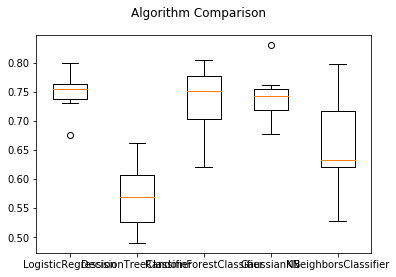

In [159]:
# evaluate each model in turn
from sklearn import model_selection
results = []
names = []
for name, i in model:
    kfold = model_selection.KFold(shuffle = True, n_splits = 10, random_state = 0)
    cv_results = model_selection.cross_val_score(i, X_s, y, cv = kfold, scoring = 'roc_auc')
    results.append(cv_results)
    names.append(name)
    print(name,':: ','biaserror: ',1-np.mean(cv_results),' variance: ',np.var((cv_results), ddof = 1))
    
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Shortlisted using pval

In [152]:
X_trainp , X_testp , y_trainp , y_testp = train_test_split ( X_p , y , test_size = 0.3 , random_state = 0 ) 

In [172]:
acc_test = []
acc_train = []
kappa = []
name = []

for k, i in model:
    i.fit(X_trainp, y_trainp)
    ypred = i.predict(X_testp)
    ypred2 = i.predict(X_trainp)
    
    name.append(k)
    acc_test.append(accuracy_score(y_testp, ypred))
    acc_train.append(accuracy_score(y_trainp, ypred2))
    kappa.append(cohen_kappa_score(y_testp,ypred))
    
    print(k)
    print(classification_report(y_testp, ypred))
    print('Train Accuracy score: ', accuracy_score(y_trainp, ypred2))
    print('Test Accuracy score: ', accuracy_score(y_testp, ypred))
    print('Confusion Matrix: \n ', confusion_matrix(y_testp, ypred))
    print('Cohen Kappa score: ', cohen_kappa_score(y_testp,ypred), '\n\n')
    

LogisticRegression
              precision    recall  f1-score   support

           0       0.70      0.90      0.79       122
           1       0.33      0.11      0.17        53

    accuracy                           0.66       175
   macro avg       0.52      0.51      0.48       175
weighted avg       0.59      0.66      0.60       175

Train Accuracy score:  0.7598039215686274
Test Accuracy score:  0.6628571428571428
Confusion Matrix: 
  [[110  12]
 [ 47   6]]
Cohen Kappa score:  0.018256156698678305 


DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.74      0.80      0.77       122
           1       0.43      0.36      0.39        53

    accuracy                           0.66       175
   macro avg       0.59      0.58      0.58       175
weighted avg       0.65      0.66      0.65       175

Train Accuracy score:  1.0
Test Accuracy score:  0.6628571428571428
Confusion Matrix: 
  [[97 25]
 [34 19]]
Cohen Kappa score:  0.161

In [156]:
r3 = pd.DataFrame(columns = ['Model', 'Test Accuracy', 'Train Accuracy', 'Cohen Kappa'])
r3['Model'] = name
r3['Test Accuracy'] = acc_test
r3['Train Accuracy'] = acc_train
r3['Cohen Kappa'] = kappa
r3

,Model,Test Accuracy,Train Accuracy,Cohen Kappa
0,LogisticRegression,0.662857,0.759804,0.018256
1,DecisionTreeClassifier,0.634286,1.000000,0.124590
2,RandomForestClassifier,0.702857,1.000000,0.182977
3,GaussianNB,0.542857,0.507353,0.241275
4,KNeighborsClassifier,0.640000,0.772059,0.016240


LogisticRegression ::  biaserror:  0.2551314529997628  variance:  0.003156446613452777
DecisionTreeClassifier ::  biaserror:  0.3917248522508253  variance:  0.007886053593052384
RandomForestClassifier ::  biaserror:  0.2815362580408429  variance:  0.00404337319624968
GaussianNB ::  biaserror:  0.26296153854451065  variance:  0.003332489906632971
KNeighborsClassifier ::  biaserror:  0.33599092599318714  variance:  0.00961130426443233


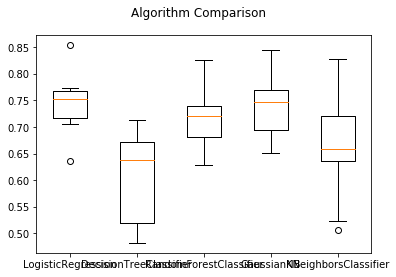

In [158]:
# evaluate each model in turn
from sklearn import model_selection
results = []
names = []
for name, i in model:
    kfold = model_selection.KFold(shuffle = True, n_splits = 10, random_state = 0)
    cv_results = model_selection.cross_val_score(i, X_p, y, cv = kfold, scoring = 'roc_auc')
    results.append(cv_results)
    names.append(name)
    print(name,':: ','biaserror: ',1-np.mean(cv_results),' variance: ',np.var((cv_results), ddof = 1))
    
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [174]:
(X.shape), (X_s.shape), (X_p.shape)

((583, 11), (583, 8), (583, 5))

# Grid Search CV

# DT

In [176]:
dt = DecisionTreeClassifier(random_state = 25)
dt.fit(X_trains, y_trains)
y_pred_dt = dt.predict(X_tests)
acc_dt = accuracy_score(y_tests, y_pred_dt)
cm_dt = confusion_matrix(y_tests, y_pred_dt)
print(classification_report(y_tests, y_pred_dt))
print(cm_dt)
print(acc_dt)
print(dt.score(X_trains, y_trains))

              precision    recall  f1-score   support

           0       0.76      0.80      0.78       122
           1       0.48      0.43      0.46        53

    accuracy                           0.69       175
   macro avg       0.62      0.61      0.62       175
weighted avg       0.68      0.69      0.68       175

[[97 25]
 [30 23]]
0.6857142857142857
1.0


In [177]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
dt_cv = GridSearchCV(estimator = dt, param_grid = param_grid, 
                          cv = n_folds, verbose = 1)

# Fit the grid search to the data
dt_cv.fit(X_train,y_train)
dt_cv.best_params_

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  80 out of  80 | elapsed:    1.6s finished


{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 100,
 'min_samples_split': 50}

In [183]:
dt = DecisionTreeClassifier(criterion= 'entropy',
 max_depth= 5,
 min_samples_leaf= 100,
 min_samples_split=50, random_state = 25)
dt.fit(X_trains, y_trains)
y_pred_dt = dt.predict(X_tests)
acc_dt = accuracy_score(y_tests, y_pred_dt)
cm_dt = confusion_matrix(y_tests, y_pred_dt)
print(classification_report(y_tests, y_pred_dt))
print(cm_dt)
print(acc_dt)
print(dt.score(X_trains, y_trains))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       122
           1       0.00      0.00      0.00        53

    accuracy                           0.70       175
   macro avg       0.35      0.50      0.41       175
weighted avg       0.49      0.70      0.57       175

[[122   0]
 [ 53   0]]
0.6971428571428572
0.7205882352941176


C:\Users\Shweta  Sharma\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [186]:
rf = RandomForestClassifier(criterion= 'entropy',
 max_depth= 5,
 min_samples_leaf= 100,
 min_samples_split=50, random_state = 25)
rf.fit(X_trains, y_trains)
y_pred_rf = rf.predict(X_tests)
acc_rf = accuracy_score(y_tests, y_pred_rf)
cm_rf = confusion_matrix(y_tests, y_pred_rf)
print(classification_report(y_tests, y_pred_rf))
print(cm_rf)
print(acc_rf)
print(rf.score(X_trains, y_trains))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       122
           1       0.00      0.00      0.00        53

    accuracy                           0.70       175
   macro avg       0.35      0.50      0.41       175
weighted avg       0.49      0.70      0.57       175

[[122   0]
 [ 53   0]]
0.6971428571428572
0.7205882352941176


C:\Users\Shweta  Sharma\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [178]:
knn = KNeighborsClassifier()
knn.fit(X_trains, y_trains)
y_pred_knn = knn.predict(X_tests)
acc_knn = accuracy_score(y_tests, y_pred_knn)
cm_knn = confusion_matrix(y_tests, y_pred_knn)
print(classification_report(y_tests, y_pred_knn))
print(cm_knn)
print(acc_knn)
print(knn.score(X_trains, y_trains))

              precision    recall  f1-score   support

           0       0.76      0.81      0.78       122
           1       0.48      0.40      0.43        53

    accuracy                           0.69       175
   macro avg       0.62      0.60      0.61       175
weighted avg       0.67      0.69      0.68       175

[[99 23]
 [32 21]]
0.6857142857142857
0.7941176470588235


In [179]:
from sklearn.neighbors import KNeighborsClassifier

grid = {'n_neighbors': np.arange(1,21),
        'weights': ['uniform','distance'],
        'metric':['cityblock','euclidean','chebyshev']}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, grid, cv=5) 
knn_cv.fit(X_s, y)
knn_cv.best_params_

{'metric': 'cityblock', 'n_neighbors': 8, 'weights': 'uniform'}

In [182]:
knn = KNeighborsClassifier(metric= 'cityblock', n_neighbors= 8, weights= 'uniform')
knn.fit(X_trains, y_trains)
y_pred_knn = knn.predict(X_tests)
acc_knn = accuracy_score(y_tests, y_pred_knn)
cm_knn = confusion_matrix(y_tests, y_pred_knn)
print(classification_report(y_tests, y_pred_knn))
print(cm_knn)
print(acc_knn)
print(knn.score(X_trains, y_trains))

              precision    recall  f1-score   support

           0       0.72      0.87      0.79       122
           1       0.41      0.21      0.28        53

    accuracy                           0.67       175
   macro avg       0.56      0.54      0.53       175
weighted avg       0.62      0.67      0.63       175

[[106  16]
 [ 42  11]]
0.6685714285714286
0.7892156862745098


In [ ]:
param = {'n_estimators':range(0,20)}
ad = AdaBoostClassifier(dt)
ad_cv = GridSearchCV(ad, param_grid = param, cv=5)
ad_cv.fit(xtrain,ytrain)
ad_cv.best_params_

In [162]:
scores = [ ]
for i in range ( 1 , 15 ):
    knn = KNeighborsClassifier ( n_neighbors = i )
    knn.fit ( X_trains , y_trains )
    knn_pred = knn.predict ( X_tests )
    scores.append ( accuracy_score ( y_tests , knn_pred ) )
result = pd.DataFrame ( { "Neighbours" : range ( 1 , 15 ) , "Accuracy" : scores } )
result

,Neighbours,Accuracy
0,1,0.628571
1,2,0.657143
2,3,0.645714
3,4,0.697143
4,5,0.685714
5,6,0.662857
6,7,0.657143
7,8,0.640000
8,9,0.668571
9,10,0.668571


In [166]:
knn = KNeighborsClassifier ( n_neighbors = 2 )
knn.fit ( X_train , y_train )
knn_pred = knn.predict ( X_test )
print ( accuracy_score ( y_test , knn_pred ) )
print ( classification_report ( y_test , knn_pred ) )

0.7028571428571428
              precision    recall  f1-score   support

           0       0.72      0.95      0.82       122
           1       0.54      0.13      0.21        53

    accuracy                           0.70       175
   macro avg       0.63      0.54      0.51       175
weighted avg       0.66      0.70      0.63       175



# SVM

In [167]:
from sklearn.svm import SVC
from sklearn import metrics
svc=SVC() #Default hyperparameters
svc.fit(X_train,y_train)
y_pred=svc.predict(X_test)
y_pred = pd.DataFrame(y_pred)
y_pred.head()

,0
0,0
1,0
2,0
3,0
4,0


In [168]:
from sklearn.model_selection import GridSearchCV 

# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
                'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']} 

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 

# fitting the model for grid search 
grid.fit(X_train, y_train) 

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.720, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.720, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.720, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.716, total=   0.0s

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s



[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.728, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.720, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.720, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.720, total=   0.1s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.716, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.728, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.1, gamma=0.01, kernel=rbf, score=0.720, total=   0.0s
[CV] 

[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.720, total=   0.0s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.716, total=   0.1s
[CV] C=10, gamma=0.001, kernel=rbf ...................................
[CV] ....... C=10, gamma=0.001, kernel=rbf, score=0.728, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.720, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.720, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.720, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] ...... C=10, gamma=0.0001, kernel=rbf, score=0.716, total=   0.0s
[CV] C=10, gamma=0.0001, kernel=rbf ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    8.2s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [169]:
# print best parameter after tuning 
print(grid.best_params_) 

# print how our model looks after hyper-parameter tuning 
print(grid.best_estimator_) 

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf', max_iter=-1,
    probability=False, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
